In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import gc
from pathlib import Path

In [2]:
DATA_DIR = Path('../input/')

In [3]:
user_dtype = {
                'node_id': np.int32,
                'f1': np.int8,
                'f2': np.int8,
                'f3': np.int8,
                'f4': np.int8,
                'f5': np.int8,
                'f6': np.int8,
                'f7': np.int8,
                'f8': np.int8,
                'f9': np.int8,
                'f10': np.int8,
                'f11': np.int8,
                'f12': np.int8,
                'f13': np.int8,
             }

train_dtype = {
                'node1_id': np.int32,
                'node2_id': np.int32,
                'is_chat': np.int8,
              }

test_dtype = {
                'id': np.int32,
                'node1_id': np.int32,
                'node2_id': np.int32,
             }

In [4]:
user_df = pd.read_csv(DATA_DIR/'user_features.csv', dtype=user_dtype)

In [5]:
user_df.head()

,node_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
0,2,14,14,14,12,12,12,7,7,7,0,0,0,15
1,3,31,9,7,31,16,12,31,15,12,31,15,12,8
2,4,0,0,0,0,0,0,0,0,0,0,0,0,7
3,5,31,4,1,31,7,1,31,9,1,31,9,0,15
4,6,31,27,20,31,24,14,31,20,10,31,20,5,7


In [6]:
user_df.shape

(8264276, 14)

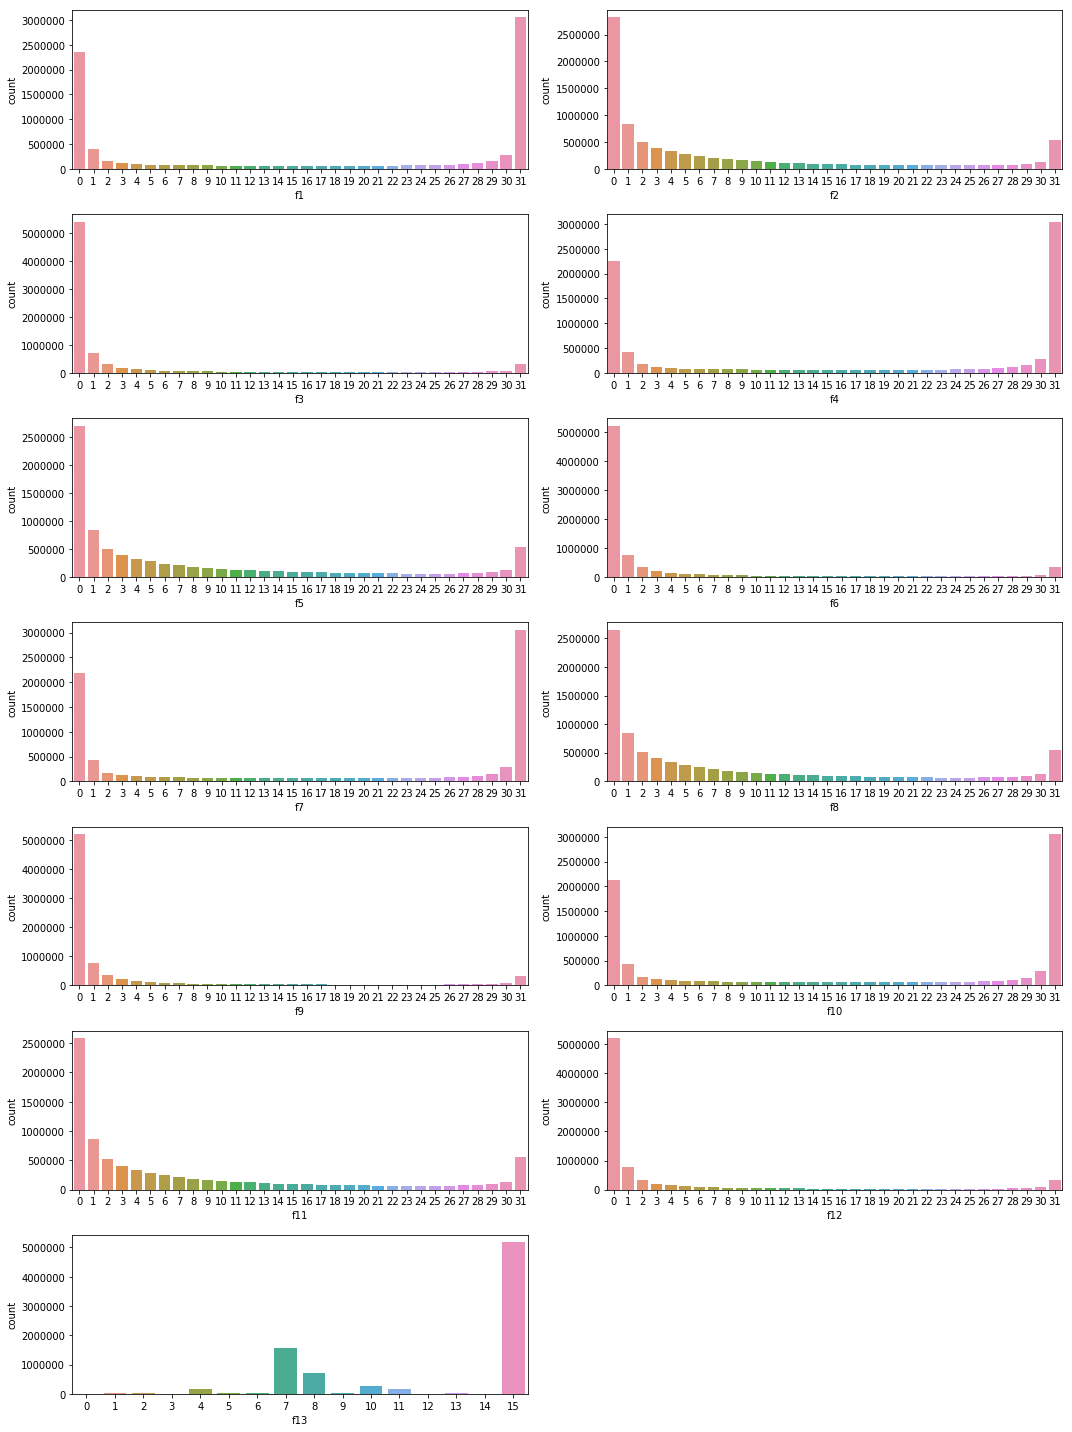

In [7]:
fig = plt.figure(figsize=(15,20))
for i, col in enumerate(user_df.columns[1:]):
    plt.subplot(7, 2, i+1)
    sns.countplot(user_df[col])
    plt.tight_layout()
plt.show()

In [8]:
user_df = user_df.reset_index()
user_df['index'] = user_df['index'].astype(np.int32)

In [9]:
user_df.head()

,index,node_id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
0,0,2,14,14,14,12,12,12,7,7,7,0,0,0,15
1,1,3,31,9,7,31,16,12,31,15,12,31,15,12,8
2,2,4,0,0,0,0,0,0,0,0,0,0,0,0,7
3,3,5,31,4,1,31,7,1,31,9,1,31,9,0,15
4,4,6,31,27,20,31,24,14,31,20,10,31,20,5,7


In [10]:
node_id_mapper = dict(zip(user_df['node_id'].values, user_df['index'].values))

In [12]:
len(node_id_mapper)

8264276

In [15]:
test_df = pd.read_csv(DATA_DIR/'test.csv', dtype=test_dtype)

In [16]:
test_df.head()

,id,node1_id,node2_id
0,1,7107094,8010772
1,2,7995251,2805801
2,3,2804693,8059549
3,4,4812472,7332370
4,5,5009985,4511909


In [17]:
test_df.shape

(11776968, 3)

In [18]:
test_df['node1_id'] = test_df['node1_id'].map(node_id_mapper)

In [19]:
test_df['node2_id'] = test_df['node2_id'].map(node_id_mapper)

In [22]:
test_df['node1_id'] = test_df['node1_id'].astype(np.int32)
test_df['node2_id'] = test_df['node2_id'].astype(np.int32)

In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11776968 entries, 0 to 11776967
Data columns (total 3 columns):
id          int32
node1_id    int32
node2_id    int32
dtypes: int32(3)
memory usage: 134.8 MB


In [24]:
test_df.head()

,id,node1_id,node2_id
0,1,6618755,7461314
1,2,7445797,2616751
2,3,2615661,7510003
3,4,4488918,6837663
4,5,4674172,4206803


In [26]:
np.save(DATA_DIR/'test.npy', test_df.values)

In [29]:
del test_df
gc.collect()

3

In [30]:
train_df = pd.read_csv(DATA_DIR/'train.csv', dtype=train_dtype)

In [31]:
train_df.head()

,node1_id,node2_id,is_chat
0,8446602,6636127,0
1,1430102,7433949,0
2,2803017,8372333,0
3,4529348,894645,0
4,5096572,4211638,0


In [33]:
train_df.shape

(70661802, 3)

In [34]:
train_df['node1_id'] = train_df['node1_id'].map(node_id_mapper)

In [37]:
train_df['node1_id'] = train_df['node1_id'].astype(np.int32)

In [38]:
gc.collect()

14

In [39]:
train_df['node2_id'] = train_df['node2_id'].map(node_id_mapper)

In [40]:
train_df['node2_id'] = train_df['node2_id'].astype(np.int32)

In [42]:
train_df.head()

,node1_id,node2_id,is_chat
0,7878545,6183871,0
1,1344419,6933058,0
2,2614005,7810503,0
3,4224053,833612,0
4,4754436,3930853,0


In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70661802 entries, 0 to 70661801
Data columns (total 3 columns):
node1_id    int32
node2_id    int32
is_chat     int8
dtypes: int32(2), int8(1)
memory usage: 606.5 MB


In [43]:
np.save(DATA_DIR/'train.npy', train_df.values)

In [44]:
del train_df
gc.collect()

14

In [46]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8264276 entries, 0 to 8264275
Data columns (total 15 columns):
index      int32
node_id    int32
f1         int8
f2         int8
f3         int8
f4         int8
f5         int8
f6         int8
f7         int8
f8         int8
f9         int8
f10        int8
f11        int8
f12        int8
f13        int8
dtypes: int32(2), int8(13)
memory usage: 165.5 MB


In [47]:
np.save(DATA_DIR/'users.npy', user_df.values)

In [48]:
users = np.load(DATA_DIR/'users.npy')

In [54]:
from sys import getsizeof

In [55]:
getsizeof(users)

112

In [57]:
users.shape

(8264276, 15)